<a href="https://colab.research.google.com/github/MbogoriL/optimizing-neural-networks/blob/main/Optimizing_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AfterWork Data Science: Optimizing Neural Networks

## Pre-requisites

In [ ]:
import pandas as pd             # pandas for data manipulation
import numpy as np              # numpy for scientific computations
import matplotlib.pyplot as plt # maplotlib for data visualisations
import seaborn as sns           # seaborn for rich visualisations

# Neural networks library and modules
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# 1. Improving Performance With Data

## Examples

### a) More Data


In this example, we will compare the performance of our neural network upon using a sample of 200 vs 500.

In [ ]:
# Challenge 1
# ---
# Create a neural network classification model that 
# predicts insurance costs given the following dataset. 
# ---
# Dataset url = https://bit.ly/30GtDfO
# ---
# YOUR CODE GOES BELOW
# 

# Loading the dataset
df = pd.read_csv('https://bit.ly/30GtDfO') 

# Creating our samples
df1 = df.sample(200)
df2 = df.sample(500)

# Selecting our features and response variable 
# Sample 1
properties = list(df1.columns.values)
properties.remove('target')
X1 = df1[properties]
y1 = df1['target']
# Sample 2
properties = list(df2.columns.values)
properties.remove('target')
X2 = df2[properties]
y2 = df2['target']

# Splitting our dataset 
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

# Defining our ANN
classifier = Sequential() 
classifier.add(Dense(units = 10, input_dim = 4, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 10, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 1, activation = "sigmoid"))

# Compiling the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Sample 1
# ---
# Fitting the model
classifier.fit(X1_train, y1_train, epochs = 20, batch_size = 10)
# Evaluating our model
loss, accuracy = classifier.evaluate(X1_test, y1_test)
print('Sample 1: ANN Accuracy:', accuracy)

Epoch 1/20
14/14 [==============================] - 1s 3ms/step - loss: 5.7877 - accuracy: 0.5929
Epoch 2/20
14/14 [==============================] - 0s 2ms/step - loss: 6.0298 - accuracy: 0.5571
Epoch 3/20
14/14 [==============================] - 0s 2ms/step - loss: 5.1958 - accuracy: 0.5929
Epoch 4/20
14/14 [==============================] - 0s 2ms/step - loss: 5.0065 - accuracy: 0.5929
Epoch 5/20
14/14 [==============================] - 0s 2ms/step - loss: 5.3213 - accuracy: 0.5786
Epoch 6/20
14/14 [==============================] - 0s 2ms/step - loss: 3.9295 - accuracy: 0.6429
Epoch 7/20
14/14 [==============================] - 0s 2ms/step - loss: 4.2912 - accuracy: 0.5857
Epoch 8/20
14/14 [==============================] - 0s 2ms/step - loss: 4.1455 - accuracy: 0.5643
Epoch 9/20
14/14 [==============================] - 0s 2ms/step - loss: 3.7262 - accuracy: 0.5929
Epoch 10/20
14/14 [==============================] - 0s 2ms/step - loss: 3.7414 - accuracy: 0.6000
Epoch 11/20
14/14 [

In [ ]:
# Sample 2
# ---
# Fitting the model
classifier.fit(X2_train, y2_train, epochs = 20, batch_size = 10)
# Evaluating our model
loss, accuracy = classifier.evaluate(X2_test, y2_test)
print('Sample 2: ANN Accuracy:', accuracy)

Epoch 1/20
35/35 [==============================] - 0s 2ms/step - loss: 1.8533 - accuracy: 0.5657
Epoch 2/20
35/35 [==============================] - 0s 2ms/step - loss: 1.5489 - accuracy: 0.5800
Epoch 3/20
35/35 [==============================] - 0s 2ms/step - loss: 1.4432 - accuracy: 0.5829
Epoch 4/20
35/35 [==============================] - 0s 2ms/step - loss: 1.3021 - accuracy: 0.5857
Epoch 5/20
35/35 [==============================] - 0s 2ms/step - loss: 1.0805 - accuracy: 0.5743
Epoch 6/20
35/35 [==============================] - 0s 2ms/step - loss: 1.0791 - accuracy: 0.5800
Epoch 7/20
35/35 [==============================] - 0s 2ms/step - loss: 0.9657 - accuracy: 0.5886
Epoch 8/20
35/35 [==============================] - 0s 2ms/step - loss: 1.0604 - accuracy: 0.5571
Epoch 9/20
35/35 [==============================] - 0s 2ms/step - loss: 0.9500 - accuracy: 0.6086
Epoch 10/20
35/35 [==============================] - 0s 2ms/step - loss: 0.8968 - accuracy: 0.5886
Epoch 11/20
35/35 [

We can see that an increase in our data resulted to an increase to our accuracy score. If this may not be outcome, we should try testing for overfitting or even increasing the size of our data.

### b) Normalizing/Scaling the Data

In [ ]:
# Challenge 1
# ---
# Create a neural network classification model that 
# predicts insurance costs given the following dataset.  
# ---
# Dataset url = https://bit.ly/30GtDfO
# ---
# YOUR CODE GOES BELOW
# 
df = pd.read_csv('https://bit.ly/30GtDfO') 

# Selecting our features and response variable 
properties = list(df.columns.values)
properties.remove('target')
X = df[properties]
y = df['target']
 
# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
# Defining our ANN
classifier = Sequential() 
classifier.add(Dense(units = 10, input_dim = 4, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 10, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 1, activation = "sigmoid"))

# Compiling the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Unscaled
# ---
# Fitting the model
classifier.fit(X_train, y_train, epochs = 20, batch_size = 10)
# Evaluating our model
loss, accuracy = classifier.evaluate(X_test, y_test)
print('Unscaled ANN Accuracy:', accuracy)

Epoch 1/20
36/36 [==============================] - 1s 2ms/step - loss: 18.1770 - accuracy: 0.4763
Epoch 2/20
36/36 [==============================] - 0s 2ms/step - loss: 9.0079 - accuracy: 0.5961
Epoch 3/20
36/36 [==============================] - 0s 2ms/step - loss: 8.8774 - accuracy: 0.5822
Epoch 4/20
36/36 [==============================] - 0s 2ms/step - loss: 7.4754 - accuracy: 0.5599
Epoch 5/20
36/36 [==============================] - 0s 3ms/step - loss: 5.5756 - accuracy: 0.6351
Epoch 6/20
36/36 [==============================] - 0s 2ms/step - loss: 5.6720 - accuracy: 0.6100
Epoch 7/20
36/36 [==============================] - 0s 2ms/step - loss: 4.3536 - accuracy: 0.6407
Epoch 8/20
36/36 [==============================] - 0s 2ms/step - loss: 4.3076 - accuracy: 0.5738
Epoch 9/20
36/36 [==============================] - 0s 2ms/step - loss: 3.5877 - accuracy: 0.6212
Epoch 10/20
36/36 [==============================] - 0s 2ms/step - loss: 3.7181 - accuracy: 0.5933
Epoch 11/20
36/36 

In [ ]:
# Scaling our features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# Fitting the model
classifier.fit(X_train, y_train, epochs = 20, batch_size = 10)

# Evaluating our model
loss, accuracy = classifier.evaluate(X_test, y_test)
print('Scaled ANN Accuracy:', accuracy)

Epoch 1/20
36/36 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5014
Epoch 2/20
36/36 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.6435
Epoch 3/20
36/36 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.6630
Epoch 4/20
36/36 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6992
Epoch 5/20
36/36 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.7019
Epoch 6/20
36/36 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.7075
Epoch 7/20
36/36 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.7159
Epoch 8/20
36/36 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.7103
Epoch 9/20
36/36 [==============================] - 0s 3ms/step - loss: 0.6315 - accuracy: 0.7131
Epoch 10/20
36/36 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.7075
Epoch 11/20
36/36 [

### c) Data Transformation

In [ ]:
# Example: Optimize your neural network by trasforming any of features in the given dataset.
# ---
# Dataset URL = http://bit.ly/IrisDataset
# ---
# YOUR CODE GOES BELOW
#

In [ ]:
# Loading our dataset
df = pd.read_csv('http://bit.ly/IrisDataset') 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Performing label encoding to the species variable
# ---
#  
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

# Encoding labels in column 'species'
df['species'] = label_encoder.fit_transform(df['species']) 
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
143,6.8,3.2,5.9,2.3,2
22,4.6,3.6,1.0,0.2,0
119,6.0,2.2,5.0,1.5,2
40,5.0,3.5,1.3,0.3,0
50,7.0,3.2,4.7,1.4,1


In [ ]:
# Solution: Without Feature Transformation
# ---
# In this case, the type of feature transformation would be whether
# our variable would have a normal distribution.
# ---
# 

# Selecting our features and response variable 
properties = list(df.columns.values)
properties.remove('species')
X = df[properties]
y = df['species']
 
# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
# Defining our ANN
classifier = Sequential() 
classifier.add(Dense(units = 10, input_dim = 4, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 10, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 1, activation = "sigmoid"))

# Compiling the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model
classifier.fit(X_train, y_train, epochs = 20, batch_size = 10)

# Evaluating our model
loss, accuracy = classifier.evaluate(X_test, y_test)
print(' ANN Accuracy:', accuracy)

Epoch 1/20
11/11 [==============================] - 2s 7ms/step - loss: 0.1734 - accuracy: 0.4000
Epoch 2/20
11/11 [==============================] - 0s 6ms/step - loss: -0.0217 - accuracy: 0.3429
Epoch 3/20
11/11 [==============================] - 0s 6ms/step - loss: -0.0179 - accuracy: 0.3238
Epoch 4/20
11/11 [==============================] - 0s 4ms/step - loss: 0.4201 - accuracy: 0.3143
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.3524
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: -0.3553 - accuracy: 0.3714
Epoch 7/20
11/11 [==============================] - 0s 4ms/step - loss: -0.3129 - accuracy: 0.3143
Epoch 8/20
11/11 [==============================] - 0s 5ms/step - loss: -0.2748 - accuracy: 0.2952
Epoch 9/20
11/11 [==============================] - 0s 4ms/step - loss: -1.3283 - accuracy: 0.3048
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: -1.3577 - accuracy: 0.4000
Epoch 11/20


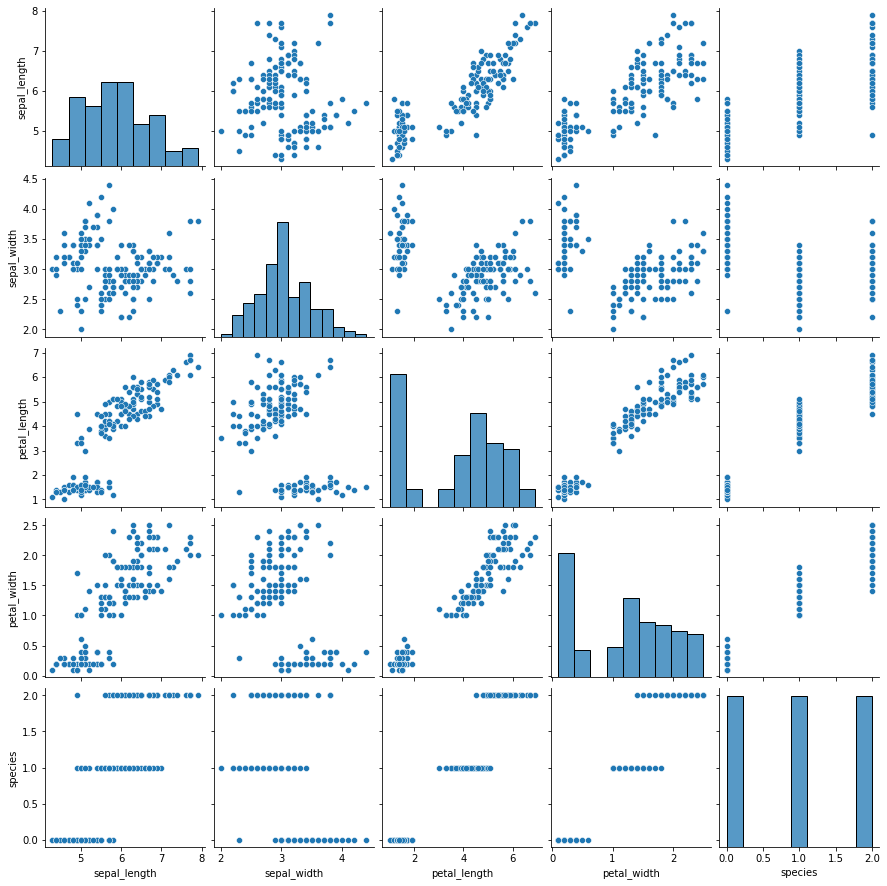

In [ ]:
# Solution: With Data Transformation

# Testing for normality 
# ---
# We will plot a pairplot so as to get an understanding of the 
# distributions of the features.
# ---
#  
sns.pairplot(df);

We can observe that feature_2 does not have a normal distribution. It is skewed to the right. Hence, we will use a boxcox to transform this feature to have a normal distribution.

In [ ]:
# Transforming our features
# ---
# 

# importing stats module from scipy library
from scipy import stats  
df.sepal_length, fitted_lambda = stats.boxcox(df['sepal_length'])  
df.sepal_width, fitted_lambda = stats.boxcox(df['sepal_width'])  
df.petal_length, fitted_lambda = stats.boxcox(df['petal_length'])  
df.petal_width, fitted_lambda = stats.boxcox(df['petal_width'])  

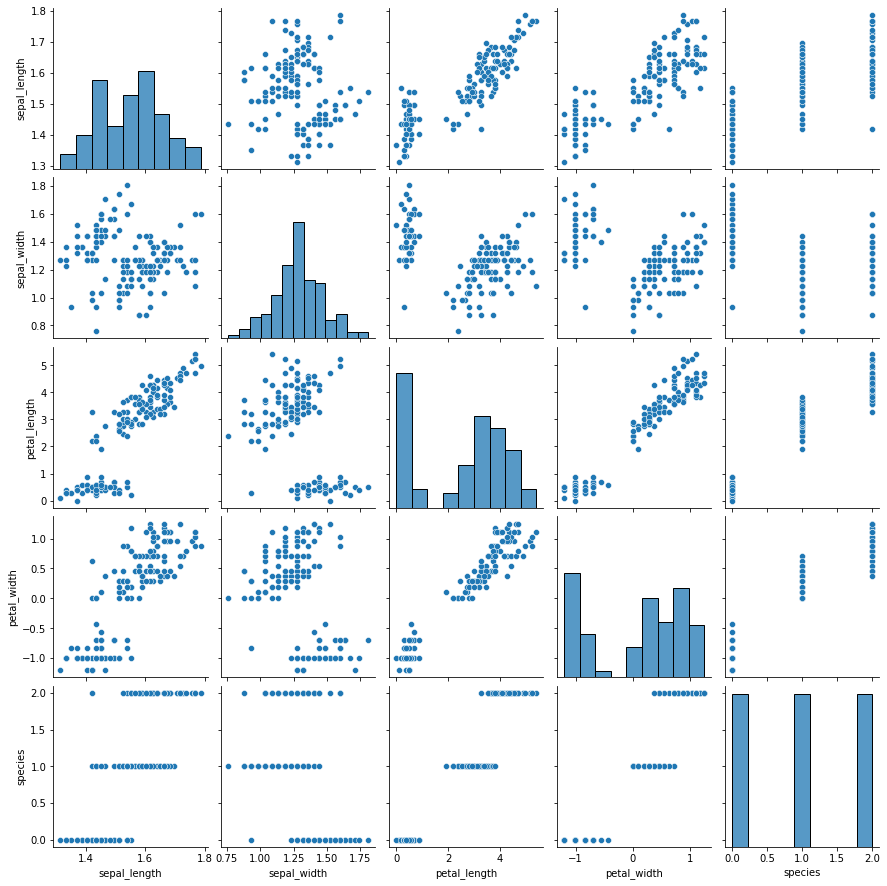

In [ ]:
# Testing for normality
# ---
# 
sns.pairplot(df);

In [ ]:
# Selecting our features and response variable 
properties = list(df.columns.values)
properties.remove('species')
X = df[properties]
y = df['species']
 
# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Defining our ANN
classifier = Sequential() 
classifier.add(Dense(units = 10, input_dim = 4, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 10, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 1, activation = "sigmoid"))

# Compiling the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model
classifier.fit(X_train, y_train, epochs = 20, batch_size = 10)
# Evaluating our model
loss, accuracy = classifier.evaluate(X_test, y_test)
print('ANN Accuracy:', accuracy)

Epoch 1/20
11/11 [==============================] - 1s 2ms/step - loss: 0.1496 - accuracy: 0.4286
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0881 - accuracy: 0.4667
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.5238
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: -0.1399 - accuracy: 0.4667
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: -0.1173 - accuracy: 0.4476
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: -0.1517 - accuracy: 0.4667
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: -0.2352 - accuracy: 0.5143
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: -0.4354 - accuracy: 0.5333
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: -0.5654 - accuracy: 0.5238
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: -0.4748 - accuracy: 0.4381
Epoch 11/20


We can observe the improvement in performance from 0.45 to 0.62 due to our data transformation.

### d) Feature Selection

In [ ]:
# Loading our dataset
df = pd.read_csv('http://bit.ly/MRFishDataset')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Solution: Without feature selection

# Loading our dataset
df = pd.read_csv('http://bit.ly/MRFishDataset') 

# Selecting our features and response variable  
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']
 
# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
# Defining our ANN
regressor = Sequential() 
regressor.add(Dense(units = 10, input_dim = 5, activation = 'relu'))
regressor.add(Dropout(0.3, seed = 2)) 
regressor.add(Dense(units = 10, activation = 'relu'))
regressor.add(Dropout(0.3, seed = 2))
regressor.add(Dense(units = 1))

# Compiling the model
regressor.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae']) 

# Fitting the model 
regressor.fit(X_train, y_train, epochs=200)

# Evaluating our model 
mse_value, mae_value = regressor.evaluate(X_test, y_test)
print('Root Mean squared error: ', np.sqrt(mse_value))

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 246914.4219 - mae: 375.6904
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 245199.7812 - mae: 374.1218
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 243247.1875 - mae: 372.4415
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 242324.7500 - mae: 371.0448
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 240551.1094 - mae: 369.9763
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 239561.4844 - mae: 368.4464
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 240139.2031 - mae: 368.6270
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 236710.5781 - mae: 365.1997
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 234724.9531 - mae: 363.9359
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 233909.5156 - mae: 363.2060
Epoch 11/

In [ ]:
# We install shap, inorder to determine which features 
# contribute the most in our neural network
# ---
#  
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 4.1 MB/s 


In [ ]:
# Determining which features contribute the most
# ---
#
import shap
shap.initjs()

explainer = shap.DeepExplainer(regressor, X_train.values)
shap_values = explainer.shap_values(X_test.values)

# Plot summary_plot as barplot
# ---
#
shap.summary_plot(shap_values, X_test, plot_type='bar')

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


AttributeError: ignored

We note that Length1 does not have an impact on our neural network, thus resolve to only use the other four features. 

In [ ]:
# Solution: With feature selection

# Loading our dataset 

# Selecting our features and response variable  
# ---
# NB: We select only three features
# ---
X = df[['Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']
 
# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
# Defining our ANN
regressor = Sequential() 
regressor.add(Dense(units = 10, input_dim = 4, activation = 'relu'))
regressor.add(Dropout(0.3, seed = 2)) 
regressor.add(Dense(units = 10, activation = 'relu'))
regressor.add(Dropout(0.3, seed = 2))
regressor.add(Dense(units = 1))

# Compiling the model
regressor.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae']) 

# Fitting the model 
regressor.fit(X_train, y_train, epochs=200)

# Evaluating our model 
mse_value, mae_value = regressor.evaluate(X_test, y_test)
print('Root Mean squared error: ', np.sqrt(mse_value))

Epoch 1/200


AttributeError: ignored

As we can see form the above RMSE values, upon selecting only four features for our dataset, we were able to improve the accuracy of our models. 

## <font color="green">Challenge</font>

In [ ]:
# Challenge 
# ---
# Create a neural networks model to predict the energy consumed by appliances in a home.
# In addition, you will be required to perform any of the optimization techniques on your data.
# ---
# Dataset URL = https://bit.ly/EnergyDataset
# ---
# YOUR CODE GOES BELOW
#

# 2. Improving Performance With Hyperparameter Tuning

We will now go through hyperparameter tuning. While we can be able to optimize our model's performance through manual tuning, we will explore the use of grid search for the different hyperparameters. 

## Examples

### a) Model Diagnostics

In this example, we will explore whether our model will be overfitting or underfitting. This would be achieved by plotting a graph of epochs vs accuracy or epochs vs loss. 

**As mentioned before:**

If the training dataset has an accuracy better than the validation /test dataset, then one should ensure that they use regularization techniques to ensure that the model is not overfitting. If training and validation/test accuracies are both low, then our model could be underfitting. Hence, one should consider increasing the capacity of the network by adding more layers/neurons or even using more training data. 


In [ ]:
# Loading our dataset
df = pd.read_csv('http://bit.ly/MRFishDataset') 

# Selecting our features and response variable  
# ---
# NB: We select only three features
# ---
X = df[['Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']
 
# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Defining our ANN
classifier = Sequential() 
classifier.add(Dense(units = 10, input_dim = 4, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2)) 
classifier.add(Dense(units = 10, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))
classifier.add(Dense(units = 1))

# Compiling the model
classifier.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae']) 

# Fitting the model 
history = classifier.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val))

# Evaluating our model 
mse_value, mae_value = classifier.evaluate(X_test, y_test)
print('Root Mean squared error: ', np.sqrt(mse_value))

In [ ]:
# Model Dignostics: Investigating Loss
# ---
# We can create a validation set that will help use determine how our model performed. 
# In addition, as we already might be aware, loss is the sum of the errors made for each example 
# in training or validation sets. If the model's prediction is perfect, the loss is zero, 
# otherwise, the loss is greater. Thus, the goal of training a model is to find a set of weights 
# and biases that have low loss, on average, across all examples. 
# Higher loss is the worse(bad prediction) for any model. Read more...(https://bit.ly/3m6kd5F)
# ---
# We plot a graph of loss vs epochs for both training and validation sets 
# and observe that a lower no. of epochs results to large values of loss 
# while a higher no. of epochs results to a a lower no of epochs.
# Hence, a using a large no. of epochs would result to a lower loss in our model.

# Fetching train and validation loss  
loss_train = history.history['loss']
loss_val = history.history['val_loss']

# Defining the no. of epochs used while training our model
epochs = range(1,501)

# Plotting our graph
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As we can observe from the graph, our model tends to perform well without overfitting for no. of epochs between 400 - 500. 

NB: When working with classification problems we can  investigate accuracy vs no. of epochs.

### b) Learning Rate

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. It determines the step size at each iteration while moving toward a minimum of a loss function thus controlling how quickly or slowly a neural network model learns a problem. Read more ... [https://bit.ly/37pFe7c]

Trying different learning rates for our model might improve our model's performance as shown below.

Something to note is that because we will be using the GridSearch function provided by scikit-learn, we will need to wrap our neural networks model in a KerasClassifier instance. This will then allow us to make use of scikit-learn's GridSearch function and  perform grid search on different learning rates.

NB: For regression problems we would import and use a KerasRegressor instance.

 

In [ ]:
# Example 1: Tuning the learning rate 
# --- 
# Create a neural network classification model that 
# predicts insurance costs given the following dataset. 
# ---
# Dataset URL = https://bit.ly/30GtDfO
# ---
# YOUR CODE GOES BELOW
# 
df = pd.read_csv('https://bit.ly/30GtDfO') 

# Selecting our features and response variable 
properties = list(df.columns.values)
properties.remove('target')
X = df[properties]
y = df['target']
 
# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
# Defining our ANN and compiling it
# ---
# To prepare our ANN model for the KerasClassifier, we wrap our ANN in 
# in a python function the pass that function pass to the KerasClassifier instance.
# Because we will be checking for different values of our leanring rate, 
# we also give a learning rate parameter to the function with a default value of 0.01.
# ---
#
def create_model(learning_rate=0.01):
  classifier = Sequential() 
  classifier.add(Dense(units = 10, input_dim = 4, activation = 'relu'))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = 10, activation = 'relu'))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = 1, activation = "sigmoid"))

  # We set the learning rate for our optimization algorithm 
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  # Compiling the model
  classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

  # returning our model
  return classifier

# Then we create the KerasClassifier instance which will contain our model.
# This instance will also train our model. 
# ---
# 
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10)

# Performing grid search
from sklearn.model_selection import GridSearchCV 
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4] 
param_grid = dict(learning_rate = learning_rate)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring = 'accuracy')
grid_result = grid.fit(X_train, y_train)

# Summarizing our grid search results
print("Best Accuracy Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

### c) Activation Functions

In [ ]:
# Example 1: Tuning activation functions
# --- 
# Create a neural network classification model that 
# predicts insurance costs given the following dataset.  
# ---
# Dataset URL = https://bit.ly/30GtDfO
# ---
# YOUR CODE GOES BELOW
# 
df = pd.read_csv('https://bit.ly/30GtDfO') 

# Selecting our features and response variable 
properties = list(df.columns.values)
properties.remove('target')
X = df[properties]
y = df['target']
 
# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
# Creating our ANN 
def create_model(activation_1='relu', activation_2='relu'):
  classifier = Sequential() 
  classifier.add(Dense(units = 10, input_dim = 4, activation = activation_1))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = 10, activation = activation_2))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = 1, activation = "sigmoid"))

  # Compiling the model
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  # returning our model
  return classifier

# Creating the KerasClassifier instance
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10)

# Performing grid search
from sklearn.model_selection import GridSearchCV  
activation = ['softmax', 'relu', 'tanh', 'sigmoid']
param_grid = dict(activation_1 = activation, activation_2 = activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring = 'accuracy')
grid_result = grid.fit(X_train, y_train)

# Summarizing our grid search results
print("Best Accuracy Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

We observe that softmax activation function works yields the best accuracy score for both hidden layers. 

### d) Network Topology

In [ ]:
# Example: No. of Neurons
# --- 
# Create a neural network classification model that 
# predicts insurance costs given the following dataset. 
# ---
# Dataset URL = https://bit.ly/30GtDfO
# ---
# YOUR CODE GOES BELOW
# 
df = pd.read_csv('https://bit.ly/30GtDfO') 

# Selecting our features and response variable 
properties = list(df.columns.values)
properties.remove('target')
X = df[properties]
y = df['target']
 
# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
# Creating our ANN 
def create_model(neurons_1=1, neurons_2=1):
  classifier = Sequential() 
  classifier.add(Dense(units = neurons_1, input_dim = 4, activation = "softmax"))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = neurons_2, activation = "softmax"))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = 1, activation = "sigmoid"))

  # Compiling the model
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  # Returning our model
  return classifier

# Creating the KerasClassifier instance 
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10)

# Performing grid search
from sklearn.model_selection import GridSearchCV  
neurons_1 = [1, 5, 10, 15]
neurons_2 = [1, 5, 10, 15]
param_grid = dict(neurons_1 = neurons_1, neurons_2 = neurons_2)  
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv=5)
grid_result = grid.fit(X_train, y_train)

# Summarizing our grid search results
print("Best Accuracy Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

You can also consider to add the number of hidden layers in order to optimize your model. 

### e) Batches and Epochs

In [ ]:
# Example: No. of batches and epochs
# --- 
# Create a neural network classification model that 
# predicts insurance costs given the following dataset. 
# ---
# Dataset URL = https://bit.ly/30GtDfO
# ---
# YOUR CODE GOES BELOW
# 
df = pd.read_csv('https://bit.ly/30GtDfO') 

# Selecting our features and response variable 
properties = list(df.columns.values)
properties.remove('target')
X = df[properties]
y = df['target']
 
# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
# Creating our ANN 
def create_model():
  classifier = Sequential() 
  classifier.add(Dense(units = 1, input_dim = 4, activation = "softmax"))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = 5, activation = "softmax"))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = 1, activation = "sigmoid"))

  # Compiling the model
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  # Returning our model
  return classifier

# Creating the KerasClassifier instance 
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Performing grid search
from sklearn.model_selection import GridSearchCV  
batch_size = [10, 20, 40]
epochs = [10, 50, 100]
param_grid = dict(batch_size = batch_size, epochs = epochs) 
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = 5)
grid_result = grid.fit(X_train, y_train)

# Summarizing our grid search results
print("Best Accuracy Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

### f) Regularization

In [ ]:
# Example: Regularization
# --- 
# Create a neural network classification model that 
# predicts insurance costs given the following dataset. 
# ---
# Dataset URL = https://bit.ly/30GtDfO
# ---
# YOUR CODE GOES BELOW
# 
df = pd.read_csv('https://bit.ly/30GtDfO') 

# Selecting our features and response variable 
properties = list(df.columns.values)
properties.remove('target')
X = df[properties]
y = df['target']
 
# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
# Creating our ANN 
def create_model(dropout_rate = 0.3):
  classifier = Sequential() 
  classifier.add(Dense(units = 10, input_dim = 4, activation = "softmax"))
  classifier.add(Dropout(dropout_rate, seed = 2))
  classifier.add(Dense(units = 10, activation = "softmax"))
  classifier.add(Dropout(dropout_rate, seed = 2))
  classifier.add(Dense(units = 1, activation = "sigmoid"))

  # Compiling the model
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  # Returning our model
  return classifier

# Creating the KerasClassifier instance 
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn = create_model, epochs=10, batch_size=10)

# Performing grid search
from sklearn.model_selection import GridSearchCV  
dropout_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
param_grid = dict(dropout_rate = dropout_rate) 
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv=5)
grid_result = grid.fit(X_train, y_train)

# Summarizing our grid search results
print("Best Accuracy Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

### g) Optimisation Functions

In [ ]:
# Example: Tuning optimization functions
# --- 
# Create an artificial neural network classification model that 
# predicts insurance costs given the following dataset. 
# ---
# Dataset URL = https://bit.ly/30GtDfO
# ---
# YOUR CODE GOES BELOW
# 
df = pd.read_csv('https://bit.ly/30GtDfO') 

# Selecting our features and response variable 
properties = list(df.columns.values)
properties.remove('target')
X = df[properties]
y = df['target']
 
# Splitting our dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
# Creating our ANN 
def create_model(optimizer = 'adam'):
  classifier = Sequential() 
  classifier.add(Dense(units = 10, input_dim = 4, activation = "softmax"))
  classifier.add(Dropout(0.1, seed = 2))
  classifier.add(Dense(units = 10, activation = "softmax"))
  classifier.add(Dropout(0.1, seed = 2))
  classifier.add(Dense(units = 1, activation = "sigmoid"))

  # Compiling the model
  classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

  # Returning our model
  return classifier

# Creating the KerasClassifier instance 
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn = create_model, epochs=10, batch_size=10)

# Performing grid search
from sklearn.model_selection import GridSearchCV  
optimizer = ['sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam']
param_grid = dict(optimizer = optimizer) 
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv=5)
grid_result = grid.fit(X_train, y_train)

# Summarizing our grid search results
print("Best Accuracy Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

## <font color="green">Challenge</font>

In [ ]:
# Challenge 
# ---
# Using the dataset in the previous challenge, apply a hyperparameter tuning technique
# to improve the performance of your model.
# ---
# Dataset URL = https://bit.ly/EnergyDataset
# ---
# YOUR CODE GOES BELOW
#